**Sabr Model**  
(StackEx) **[SABR Model Pricing Engine in Python QuantLib](https://quant.stackexchange.com/questions/57786/sabr-model-pricing-engine-in-python-quantlib)**


<img src='sabrVol-const.png' width='600'>

In [1]:
import QuantLib as ql
alpha, beta,  nu,   rho    =\
1.63,  0.6,  3.3, 0.00002
ql.sabrVolatility(106, 120, 17/365, alpha, beta, nu, rho)

0.33284656705268817

- op.minimizeのbounds, constraintsの書き方は神戸大学 [SciPy.optimize：解の求め方と最適化問題](https://py4basics.github.io/7_SciPy_optimize.html)を参照
- op.minimizeの戻り値は辞書。従って fndMIN.xと書ける。
- StackExではconstraintsを使用<< 書き方の参考になる
- 誤差の計算で、RMSEは動いたが、MSEではエラーになった！

**Fixed Beta=0.5 (Fig 8.9)**

In [2]:
import QuantLib as ql ; import matplotlib.pyplot as plt
import numpy as np ;    import scipy.optimize as op

futPRC,    YR,     PRMs,           BNDs                                 =\
36610,   18/365, [0.1]*4, [(0,None),(0,1),(0,None),(0,1)]  
                   # PRMs=[  alpha, beta,  volvol,  rho ]
CNSTs = ({'type':'eq', 'fun':lambda x:0.5-x[1]})          #fix Beta=0.5
STKs = [31000,31500,32000,32500,33000,33500,34000,34500,35000,
        35500,36000,36500,37000,37500,38000,38500,40000,41000]
mVols = [34.3,32.2,30.3,28.9,27.0,25.4,23.8,22.4,21.4,
         20.7,20.2,19.7,19.8,19.7,19.9,20.3,21.7,23.2]

def calcRMSE(PRMs):
    vols = [ql.sabrVolatility(XX, futPRC, YR, *PRMs) for XX in STKs]
    return ((np.array(vols) - np.array(mVols))**2 ).mean()**.5

fndMIN = op.minimize(calcRMSE, PRMs, bounds=BNDs, constraints=CNSTs) ; fndMIN

     fun: 1.200212939691126
     jac: array([3.14414501e-06, 5.39957970e-01, 8.23140144e-05, 5.80162641e+00])
 message: 'Optimization terminated successfully'
    nfev: 229
     nit: 44
    njev: 44
  status: 0
 success: True
       x: array([437.0840149 ,   0.5       ,  42.39899939,   0.        ])

**(Fig 8.10)**

calc Vols: 32.7521, 31.1837, 29.6350, 28.1101, 26.6153, 25.1609, 23.7638, 22.4507, 21.2643, 20.2685, 19.5487, 19.1911, 19.2385, 19.6574, 20.3591, 21.2476, 24.4027, 26.6069, 

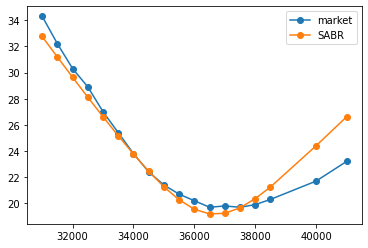

In [3]:
print('calc Vols: ', end='')
cVols = [ql.sabrVolatility(XX, futPRC, YR, *fndMIN.x) for XX in STKs]
for vv in cVols: print(f'{vv:.4f}', end=', ')
plt.plot(STKs, mVols, marker='o', label="market")
plt.plot(STKs, cVols, marker='o', label="SABR")
plt.legend();

**No limit at Beta**

In [4]:
futPRC,    YR,     PRMs,           BNDs                                 =\
36610,   18/365, [0.1]*4, [(0,None),(0,1),(0,None),(0,1)]  
                   # PRMs=[  alpha, beta,  volvol,  rho ]
                                                            # CNSTsを無くした
STKs = [31000,31500,32000,32500,33000,33500,34000,34500,35000,
        35500,36000,36500,37000,37500,38000,38500,40000,41000]
mVols = [34.3,32.2,30.3,28.9,27.0,25.4,23.8,22.4,21.4,
         20.7,20.2,19.7,19.8,19.7,19.9,20.3,21.7,23.2]

def calcRMSE(PRMs):
    vols = [ql.sabrVolatility(XX, futPRC, YR, *PRMs) for XX in STKs]
    return ((np.array(vols) - np.array(mVols))**2 ).mean()**.5

fndMIN = op.minimize(calcRMSE, PRMs, bounds=BNDs) ; fndMIN  #constraintsを無くした

      fun: 0.9447332664499835
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.44163511e-07, -2.78332912e-04, -2.36477485e-06,  5.43405295e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1910
      nit: 274
     njev: 382
   status: 0
  success: True
        x: array([7.56138525e+04, 1.22507777e-02, 4.18139776e+01, 0.00000000e+00])

calc Vols: 32.9518, 31.3667, 29.8052, 28.2712, 26.7711, 25.3152, 23.9200, 22.6110, 21.4283, 20.4302, 19.6928, 19.2922, 19.2670, 19.5910, 20.1872, 20.9689, 23.8218, 25.8400, 

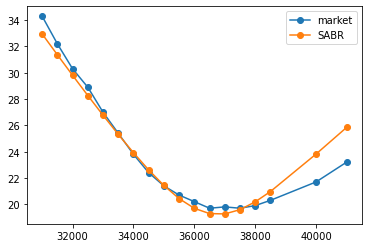

In [5]:
print('calc Vols: ', end='')
cVols = [ql.sabrVolatility(XX, futPRC, YR, *fndMIN.x) for XX in STKs]
for vv in cVols: print(f'{vv:.4f}', end=', ')
plt.plot(STKs, mVols, marker='o', label="market")
plt.plot(STKs, cVols, marker='o', label="SABR")
plt.legend();